In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [3]:
train_csv=pd.read_csv("drive/MyDrive/Znaci/Train.csv")
test_csv=pd.read_csv("drive/MyDrive/Znaci/Test.csv")

In [4]:
from google.colab import output 
def ucitaj_slike(csv_file,visina,sirina):

  putanje=list("drive/MyDrive/Znaci/"+csv_file["Path"])

  slike=[]
  
  labele=[]

  m=len(putanje)


  for i in range(m) :
    putanja=putanje[i]
    slika=Image.open(putanja)
    slika=slika.resize((visina,sirina))
    slika=np.array(slika)
    slike.append(slika)
    labela=csv_file["ClassId"][i]
    labele.append(labela)
    print("Ucitana je {}. slika.".format(i))
    output.clear()  


  slike=np.array(slike)
  labele=np.array(labele)

  print("Ucitavanje slika je zavrseno!")

  labele=labele.reshape(1,m)

  return slike,labele

In [5]:
slike_train,labele_train=ucitaj_slike(train_csv,32,32)

Ucitavanje slika je zavrseno!


In [6]:

print(slike_train.shape)

(39209, 32, 32, 3)


In [7]:
slike_test,labele_test=ucitaj_slike(test_csv,32,32)

Ucitavanje slika je zavrseno!


In [9]:
print("Oblik tenzora slike_train: "+str(slike_train.shape))
print("Oblik tenzora slike_test: "+str(slike_test.shape))
print("Oblik tenzora labele_train: "+str(labele_train.shape))
print("Oblik tenzora labele_test: "+str(labele_test.shape))
print("Ukupan broj slika u trening skupu: "+str(slike_train.shape[0]))
print("Ukupan broj slika u test skupu: "+str(slike_test.shape[0]))

Oblik tenzora slike_train: (39209, 32, 32, 3)
Oblik tenzora slike_test: (12630, 32, 32, 3)
Oblik tenzora labele_train: (1, 39209)
Oblik tenzora labele_test: (1, 12630)
Ukupan broj slika u trening skupu: 39209
Ukupan broj slika u test skupu: 12630


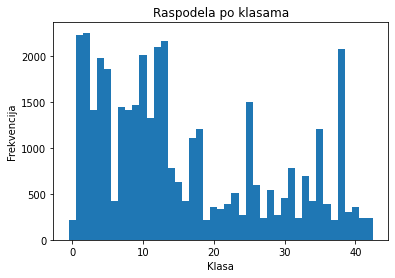

In [10]:
klase={
0: "Ograničenje brzine 20 km/",
1: "Ograničenje brzine 30 km/h",
2: "Ograničenje brzine 50 km/h",
3: "Ograničenje brzine 60 km/h",
4: "Ograničenje brzine 70 km/h",
5: "Ograničenje brzine 80 km/h",
6: "Prestanak ograničenja brzine 80 km/h",
7: "Ograničenje brzine 100 km/h",
8: "Ograničenje brzine 120 km/h",
9: "Zabrana preticanja svih motornih vozila",
10: "Zabrana preticanja za teretna vozila",
11: "Ukrštanje sa sporednim putem pod pravim uglom",
12: "Put sa prvenstvom prolaza",
13: "Ukrštanje sa putem sa prvenstvom prolaza",
14: "Stop",
15: "Zabrana saobraćaja u oba smera",
16: "Zabrana saobraćaja za teretna vozila",
17: "Zabrana saobraćaja u jednom smeru",
18: "Opasnost na putu",
19: "Opasna krivina levo",
20: "Opasna krivina desno",
21: "Dvostruka krivina",
22: "Neravan kolovoz",
23: "Klizav kolovoz",
24: "Suženje puta s desne strane",
25: "Radovi na putu",
26: "Nailazak na semafore",
27: "Pešački prelaz",
28: "Deca na putu",
29: "Biciklisti na putu",
30: "Opasnost od poledice na putu",
31: "Divljač na putu",
32: "Prestanak svih zabrana",
33: "Obavezan smer desno",
34: "Obavezan smer levo",
35: "Obavezan smer pravo",
36: "Dozvoljen smer desno",
37: "Dozvoljen smer levo",
38: "Obavezno obilaženje s desne strane",
39: "Obavezno obilaženje s leve strane",
40: "Kružni tok saobraćaja",
41: "Prestanak zabrane preticanja motornih vozila",
42: "Prestanak zabrane preticanja za teretna vozila"

}

unique,counts=np.unique(labele_train,return_counts=True)
plt.bar(unique, counts, 1)
plt.title('Raspodela po klasama')
plt.xlabel('Klasa')
plt.ylabel('Frekvencija')
plt.show()

def vrati_tezine(counts):
  L=len(counts)

  maksimalna_vrednost=counts.max()

  tezine={
    
  }
  for i in range(L):
    tezine[i]=maksimalna_vrednost/counts[i]

  
  return tezine

tezine=vrati_tezine(counts)

In [52]:
tezine

{0: 10.714285714285714,
 1: 1.0135135135135136,
 2: 1.0,
 3: 1.5957446808510638,
 4: 1.1363636363636365,
 5: 1.2096774193548387,
 6: 5.357142857142857,
 7: 1.5625,
 8: 1.5957446808510638,
 9: 1.530612244897959,
 10: 1.1194029850746268,
 11: 1.7045454545454546,
 12: 1.0714285714285714,
 13: 1.0416666666666667,
 14: 2.8846153846153846,
 15: 3.5714285714285716,
 16: 5.357142857142857,
 17: 2.027027027027027,
 18: 1.875,
 19: 10.714285714285714,
 20: 6.25,
 21: 6.818181818181818,
 22: 5.769230769230769,
 23: 4.411764705882353,
 24: 8.333333333333334,
 25: 1.5,
 26: 3.75,
 27: 9.375,
 28: 4.166666666666667,
 29: 8.333333333333334,
 30: 5.0,
 31: 2.8846153846153846,
 32: 9.375,
 33: 3.265602322206096,
 34: 5.357142857142857,
 35: 1.875,
 36: 5.769230769230769,
 37: 10.714285714285714,
 38: 1.0869565217391304,
 39: 7.5,
 40: 6.25,
 41: 9.375,
 42: 9.375}

In [11]:
slike_train_norm=slike_train/255
slike_test_norm=slike_test/255

In [12]:
def one_hot_matrix(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [24]:
L=len(unique)

labele_train_one_hot=one_hot_matrix(labele_train,L).T
labele_test_one_hot=one_hot_matrix(labele_test,L).T

In [20]:
import tensorflow as tf
import random as rn 
import numpy as np
import keras
np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

from keras.models import Sequential
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn


def identity_block(X, f, filters):

    F1, F2, F3 = filters

    X_pom = X
    
    
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid',kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)   

    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same',kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid',kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)

    X = Add()([X, X_pom])
    X = Activation('relu')(X)
    
    return X

def convolutional_block(X, f, filters, s = 2):

    
    F1, F2, F3 = filters
    
    
    X_pom = X

    X = Conv2D(F1, (1, 1), strides = (s,s),kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    
    X = Conv2D(F2, (f, f), strides = (1, 1), padding = 'same',kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    X = Conv2D(F3, (1, 1), strides = (1, 1), padding = 'valid',kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)

    
    X_pom = Conv2D(F3, (1, 1), strides = (s, s), padding = 'valid',kernel_initializer = glorot_uniform(seed=0))(X_pom)
    X_pom = BatchNormalization(axis = 3)(X_pom)

  
    X = Add()([X, X_pom])
    X = Activation('relu')(X)
    
    return X

def ResNet50(input_shape = (64, 64, 3), classes = 6):
     
    X_input = Input(input_shape)

    
    
    X = ZeroPadding2D((3, 3))(X_input)
    
  
    X = Conv2D(64, (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

  
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])


    X = convolutional_block(X, f = 3, filters = [128,128,512],s = 2)
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])

    X = convolutional_block(X, f = 3, filters = [256, 256, 1024],s = 2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])

    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], s = 2)
    X = identity_block(X, 3, [512, 512, 2048])
    X = identity_block(X, 3, [512, 512, 2048])

    X = AveragePooling2D(pool_size=(2,2),padding="same")(X)
    

    X = Flatten()(X)
    X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform(seed=0))(X)
    
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model


In [14]:
from keras.initializers import glorot_uniform

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

resnet50=ResNet50((32,32,3),L)

activation="relu"
lr=0.001
bs=32

resnet50.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history1 = resnet50.fit(slike_train_norm, labele_train_one_hot, batch_size=32,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
1226/1226 [==============================] - 54s 40ms/step - loss: 11.5863 - accuracy: 0.0492 - val_loss: 12.4949 - val_accuracy: 0.0341
Epoch 2/30
1226/1226 [==============================] - 48s 39ms/step - loss: 9.6588 - accuracy: 0.1027 - val_loss: 2.6786 - val_accuracy: 0.2514
Epoch 3/30
1226/1226 [==============================] - 48s 39ms/step - loss: 5.3066 - accuracy: 0.3412 - val_loss: 1.8109 - val_accuracy: 0.4632
Epoch 4/30
1226/1226 [==============================] - 48s 39ms/step - loss: 2.8812 - accuracy: 0.6215 - val_loss: 109.3397 - val_accuracy: 0.3814
Epoch 5/30
1226/1226 [==============================] - 48s 39ms/step - loss: 2.0333 - accuracy: 0.7422 - val_loss: 10.7518 - val_accuracy: 0.2568
Epoch 6/30
1226/1226 [==============================] - 48s 39ms/step - loss: 2.5297 - accuracy: 0.6702 - val_loss: 1.8019 - val_accuracy: 0.7665
Epoch 7/30
1226/1226 [==============================] - 48s 39ms/step - loss: 1.4790 - accuracy: 0.8078 - val_loss: 0.6

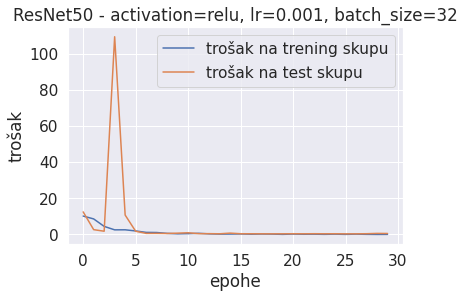

In [ ]:
train_losses1=history1.history["loss"]
test_losses1=history1.history["val_loss"]

plt.plot(train_losses1,label="trošak na trening skupu")
plt.plot(test_losses1,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("ResNet50 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

In [ ]:
labele_pred1=resnet50.predict(x=slike_test_norm)

In [ ]:
eval1=resnet50.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 4s 10ms/step - loss: 0.5595 - accuracy: 0.8914


In [ ]:
labele_pred_conf1=np.argmax(labele_pred1, axis=1)
labele_test_conf1=labele_test.reshape(labele_pred_conf1.shape[0],)
conf1=confusion_matrix(labele_test_conf1,labele_pred_conf1)
conf1

array([[ 57,   3,   0, ...,   0,   0,   0],
       [  8, 694,   2, ...,   0,   0,   0],
       [  0,  53, 674, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  36,   0,   0],
       [  0,   0,   0, ...,   0,  55,   0],
       [  0,   0,   0, ...,   0,   0,  90]])

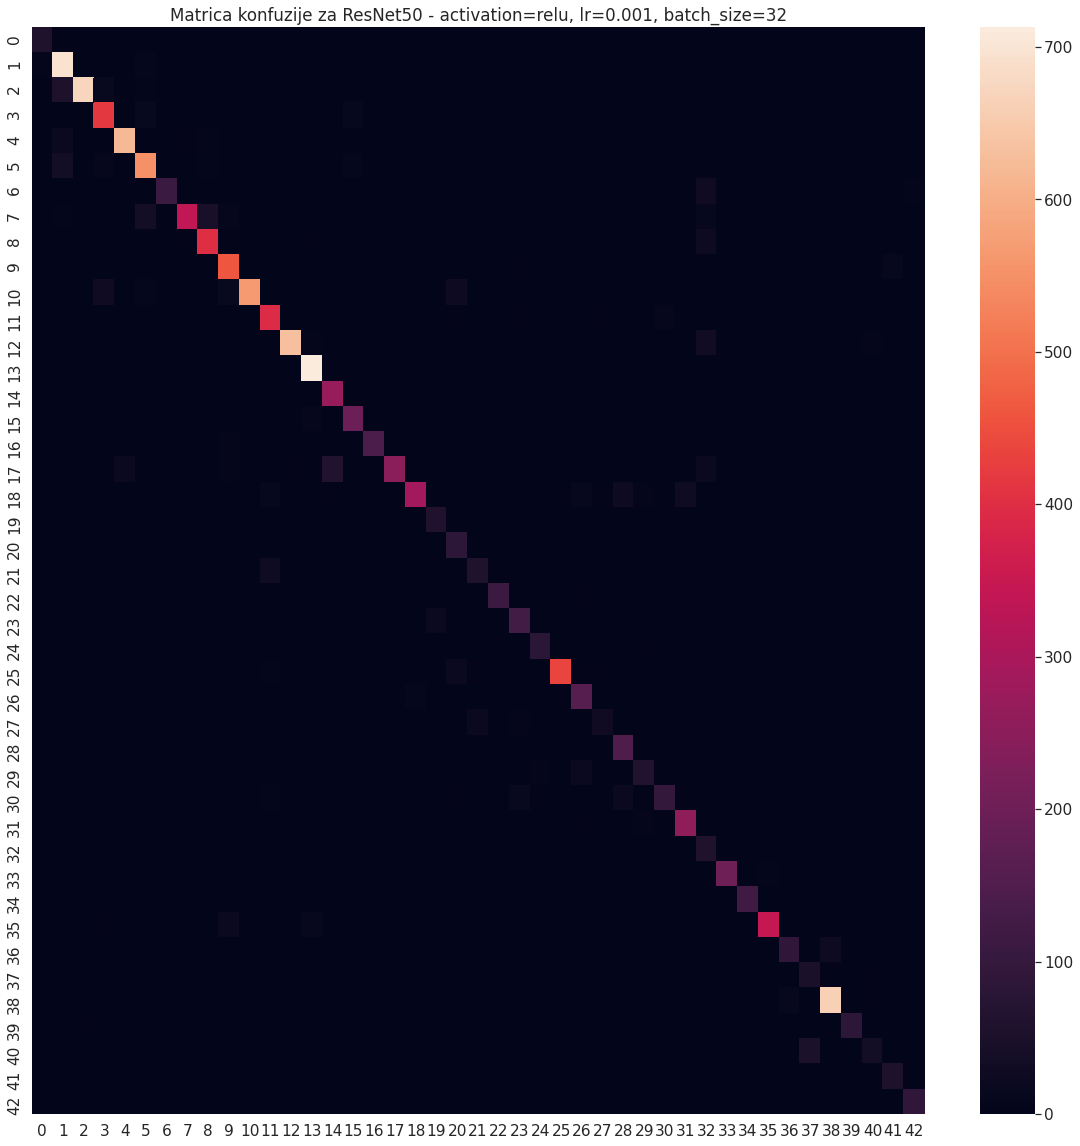

In [ ]:

df_cm = pd.DataFrame(conf1, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za ResNet50 - activation=relu, lr=0.001, batch_size=32")
plt.show()

In [ ]:
izvestaj1=classification_report(labele_test_conf1, labele_pred_conf1)

print(izvestaj1)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        60
           1       0.84      0.96      0.90       720
           2       0.99      0.90      0.94       750
           3       0.87      0.92      0.90       450
           4       0.95      0.94      0.94       660
           5       0.87      0.87      0.87       630
           6       1.00      0.74      0.85       150
           7       0.98      0.75      0.85       450
           8       0.86      0.89      0.87       450
           9       0.88      0.96      0.92       480
          10       1.00      0.86      0.92       660
          11       0.87      0.94      0.90       420
          12       0.98      0.91      0.95       690
          13       0.94      0.99      0.96       720
          14       0.78      1.00      0.88       270
          15       0.86      0.93      0.90       210
          16       1.00      0.94      0.97       150
          17       1.00    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

resnet50=ResNet50((32,32,3),L)

resnet50.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history2 = resnet50.fit(slike_train_norm, labele_train_one_hot, batch_size=64,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
613/613 [==============================] - 35s 49ms/step - loss: 8.5688 - accuracy: 0.1565 - val_loss: 1.5818 - val_accuracy: 0.5067
Epoch 2/30
613/613 [==============================] - 29s 48ms/step - loss: 3.1647 - accuracy: 0.6551 - val_loss: 1.7188 - val_accuracy: 0.6451
Epoch 3/30
613/613 [==============================] - 29s 47ms/step - loss: 2.2997 - accuracy: 0.7723 - val_loss: 1.0074 - val_accuracy: 0.7106
Epoch 4/30
613/613 [==============================] - 29s 48ms/step - loss: 1.5005 - accuracy: 0.8003 - val_loss: 119.0075 - val_accuracy: 0.1492
Epoch 5/30
613/613 [==============================] - 29s 48ms/step - loss: 1.5929 - accuracy: 0.8238 - val_loss: 1.5130 - val_accuracy: 0.5513
Epoch 6/30
613/613 [==============================] - 29s 48ms/step - loss: 1.2233 - accuracy: 0.8353 - val_loss: 0.7292 - val_accuracy: 0.8127
Epoch 7/30
613/613 [==============================] - 29s 47ms/step - loss: 0.6310 - accuracy: 0.9125 - val_loss: 1.0227 - val_accurac

In [ ]:
labele_pred2=resnet50.predict(x=slike_test_norm)

eval2=resnet50.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 4s 9ms/step - loss: 0.4621 - accuracy: 0.9001


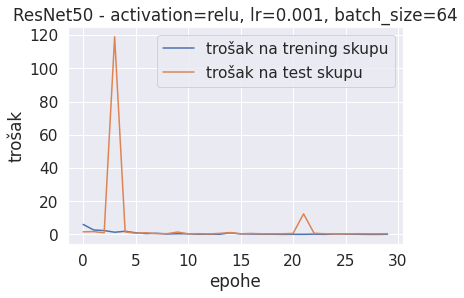

In [ ]:
train_losses2=history2.history["loss"]
test_losses2=history2.history["val_loss"]

plt.plot(train_losses2,label="trošak na trening skupu")
plt.plot(test_losses2,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("ResNet50 - activation=relu, lr=0.001, batch_size=64")
plt.show()


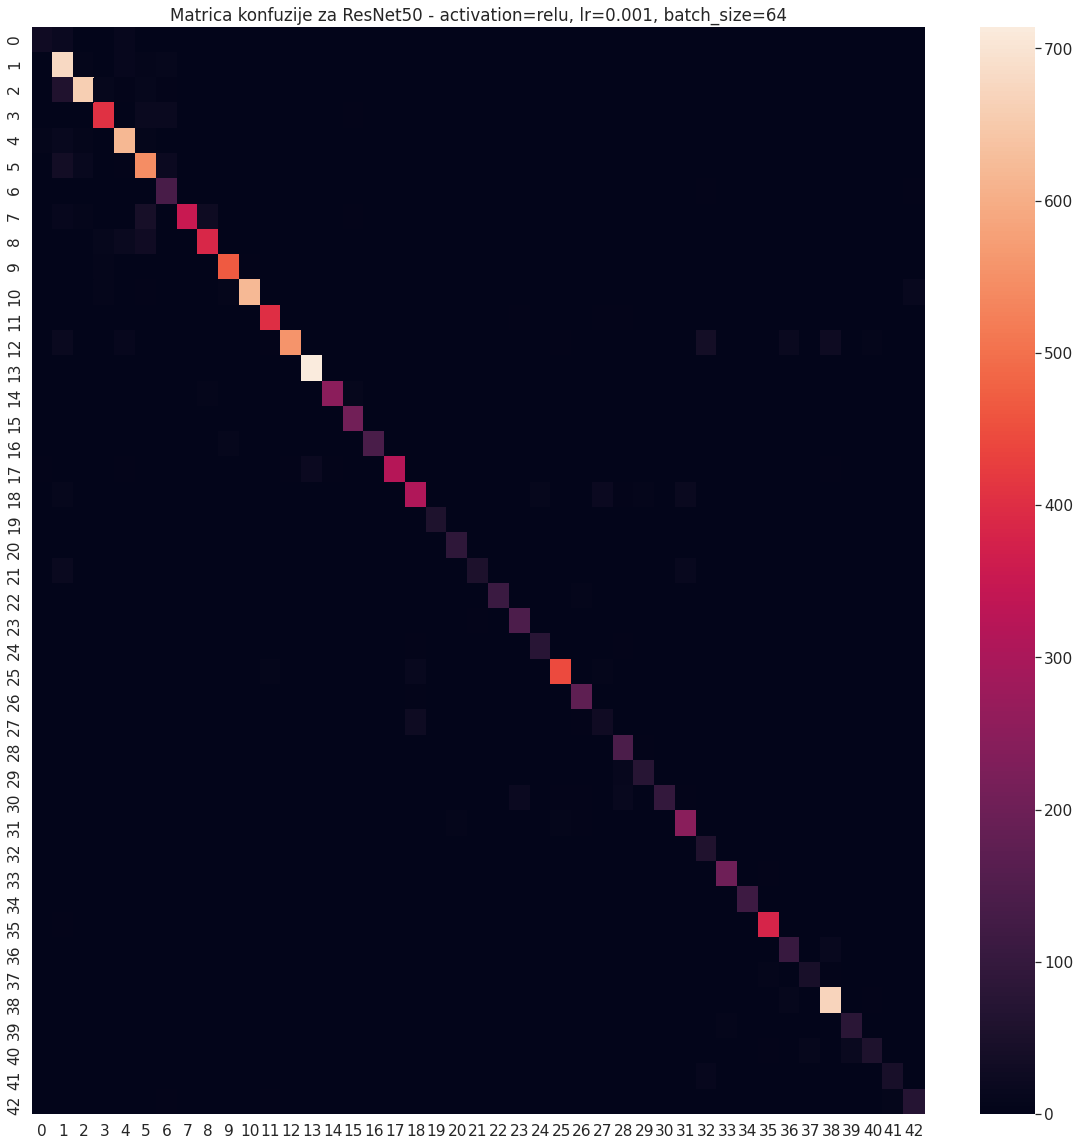

In [ ]:
labele_pred_conf2=np.argmax(labele_pred2, axis=1)
labele_test_conf2=labele_test.reshape(labele_pred_conf2.shape[0],)
conf2=confusion_matrix(labele_test_conf2,labele_pred_conf2)

df_cm = pd.DataFrame(conf2, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za ResNet50 - activation=relu, lr=0.001, batch_size=64")
plt.show()

In [ ]:
izvestaj2=classification_report(labele_test_conf2, labele_pred_conf2)

print(izvestaj2)

              precision    recall  f1-score   support

           0       0.74      0.47      0.57        60
           1       0.77      0.94      0.85       720
           2       0.94      0.88      0.91       750
           3       0.90      0.90      0.90       450
           4       0.90      0.94      0.92       660
           5       0.82      0.86      0.84       630
           6       0.70      0.91      0.79       150
           7       0.99      0.78      0.87       450
           8       0.91      0.86      0.88       450
           9       0.95      0.97      0.96       480
          10       0.99      0.94      0.97       660
          11       0.95      0.95      0.95       420
          12       0.99      0.81      0.89       690
          13       0.97      0.99      0.98       720
          14       0.98      0.93      0.96       270
          15       0.89      1.00      0.94       210
          16       0.99      0.92      0.96       150
          17       1.00    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

resnet50=ResNet50((32,32,3),L)

resnet50.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history3 = resnet50.fit(slike_train_norm, labele_train_one_hot, batch_size=128,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 25s 68ms/step - loss: 8.3072 - accuracy: 0.1668 - val_loss: 2.5876 - val_accuracy: 0.3164
Epoch 2/30
307/307 [==============================] - 20s 66ms/step - loss: 2.9031 - accuracy: 0.6368 - val_loss: 2.5193 - val_accuracy: 0.4098
Epoch 3/30
307/307 [==============================] - 20s 66ms/step - loss: 1.3554 - accuracy: 0.7957 - val_loss: 0.9314 - val_accuracy: 0.7423
Epoch 4/30
307/307 [==============================] - 20s 66ms/step - loss: 0.9276 - accuracy: 0.8676 - val_loss: 1.0858 - val_accuracy: 0.7089
Epoch 5/30
307/307 [==============================] - 21s 67ms/step - loss: 0.5179 - accuracy: 0.9081 - val_loss: 0.6395 - val_accuracy: 0.8287
Epoch 6/30
307/307 [==============================] - 21s 68ms/step - loss: 0.2361 - accuracy: 0.9567 - val_loss: 0.5739 - val_accuracy: 0.8597
Epoch 7/30
307/307 [==============================] - 21s 69ms/step - loss: 0.1557 - accuracy: 0.9729 - val_loss: 0.6531 - val_accuracy:

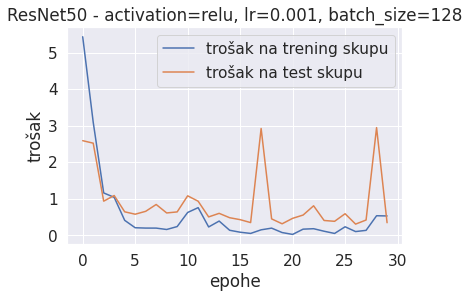

In [ ]:
train_losses3=history3.history["loss"]
test_losses3=history3.history["val_loss"]

plt.plot(train_losses3,label="trošak na trening skupu")
plt.plot(test_losses3,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("ResNet50 - activation=relu, lr=0.001, batch_size=128")
plt.show()

In [ ]:
labele_pred3=resnet50.predict(x=slike_test_norm)

eval3=resnet50.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 4s 9ms/step - loss: 0.3409 - accuracy: 0.9105


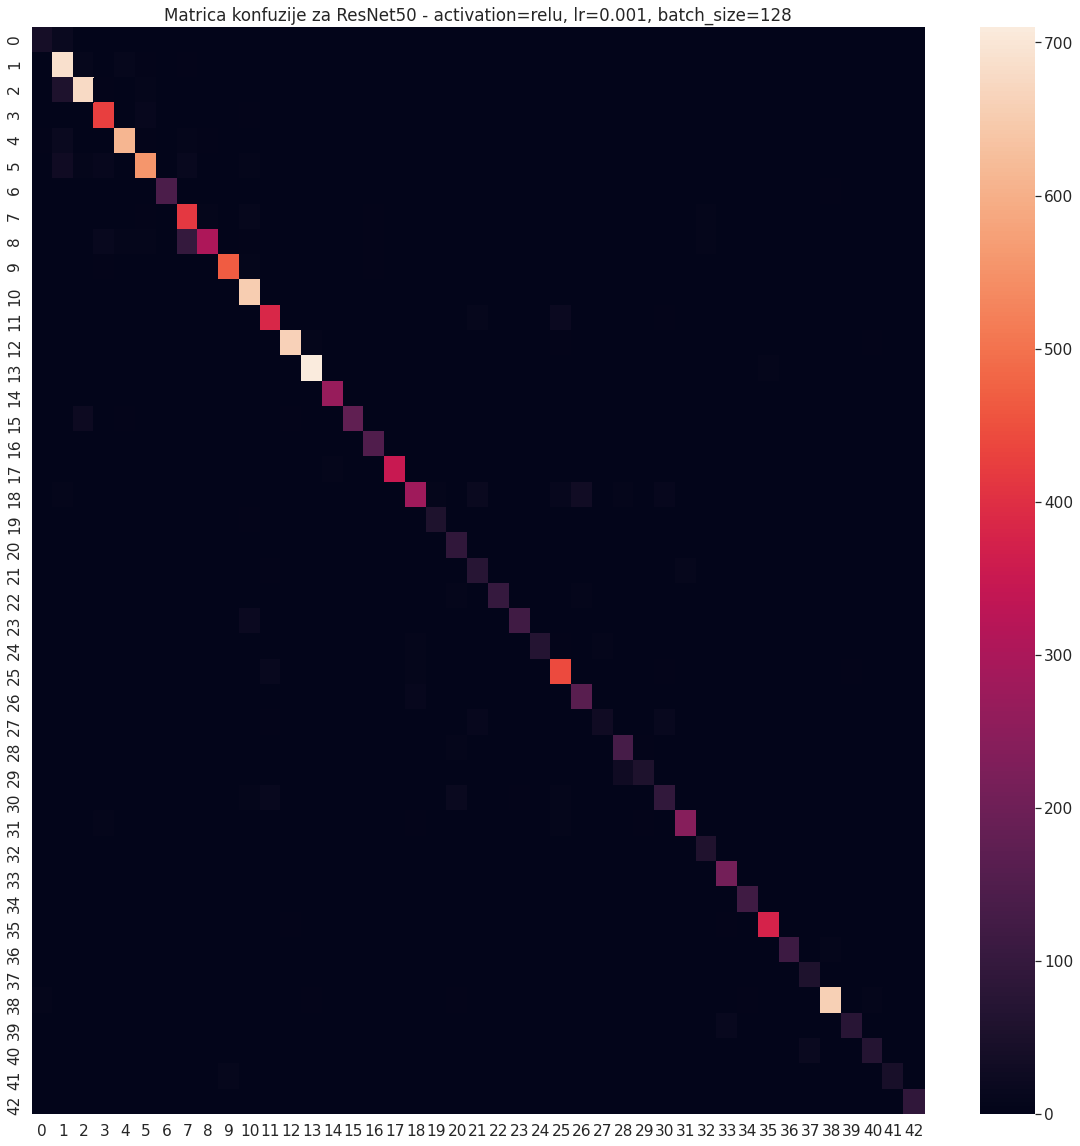

In [ ]:
labele_pred_conf3=np.argmax(labele_pred3, axis=1)
labele_test_conf3=labele_test.reshape(labele_pred_conf3.shape[0],)
conf3=confusion_matrix(labele_test_conf3,labele_pred_conf3)

df_cm = pd.DataFrame(conf3, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za ResNet50 - activation=relu, lr=0.001, batch_size=128")
plt.show()

In [ ]:
izvestaj3=classification_report(labele_test_conf3, labele_pred_conf3)

print(izvestaj3)

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        60
           1       0.83      0.96      0.89       720
           2       0.94      0.90      0.92       750
           3       0.90      0.95      0.92       450
           4       0.96      0.93      0.94       660
           5       0.93      0.88      0.91       630
           6       0.98      0.93      0.96       150
           7       0.77      0.92      0.84       450
           8       0.96      0.67      0.79       450
           9       0.97      0.97      0.97       480
          10       0.91      0.99      0.95       660
          11       0.89      0.91      0.90       420
          12       0.98      0.96      0.97       690
          13       0.98      0.99      0.98       720
          14       0.96      0.99      0.98       270
          15       0.99      0.84      0.91       210
          16       0.93      0.99      0.95       150
          17       0.99    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

resnet50=ResNet50((32,32,3),L)

activation="relu"
lr=0.001
bs=256

resnet50.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history4 = resnet50.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
154/154 [==============================] - 21s 110ms/step - loss: 8.4323 - accuracy: 0.1496 - val_loss: 3.7419 - val_accuracy: 0.0663
Epoch 2/30
154/154 [==============================] - 16s 104ms/step - loss: 1.7276 - accuracy: 0.7227 - val_loss: 1.8214 - val_accuracy: 0.4774
Epoch 3/30
154/154 [==============================] - 16s 105ms/step - loss: 0.7183 - accuracy: 0.8697 - val_loss: 1.0300 - val_accuracy: 0.7329
Epoch 4/30
154/154 [==============================] - 16s 106ms/step - loss: 0.2655 - accuracy: 0.9509 - val_loss: 0.8881 - val_accuracy: 0.7983
Epoch 5/30
154/154 [==============================] - 17s 108ms/step - loss: 0.2234 - accuracy: 0.9613 - val_loss: 3.6785 - val_accuracy: 0.4865
Epoch 6/30
154/154 [==============================] - 17s 109ms/step - loss: 0.6237 - accuracy: 0.8998 - val_loss: 0.9424 - val_accuracy: 0.7798
Epoch 7/30
154/154 [==============================] - 17s 109ms/step - loss: 0.2109 - accuracy: 0.9649 - val_loss: 0.5531 - val_ac

In [ ]:
labele_pred4=resnet50.predict(x=slike_test_norm)

eval4=resnet50.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 4s 9ms/step - loss: 0.5009 - accuracy: 0.8917


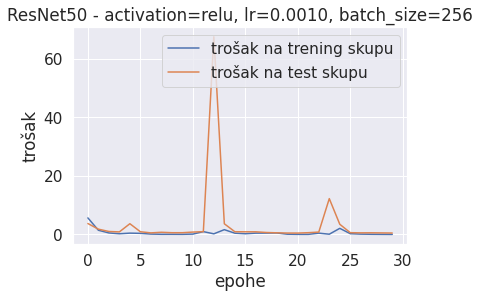

In [ ]:
train_losses4=history4.history["loss"]
test_losses4=history4.history["val_loss"]

plt.plot(train_losses4,label="trošak na trening skupu")
plt.plot(test_losses4,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("ResNet50 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

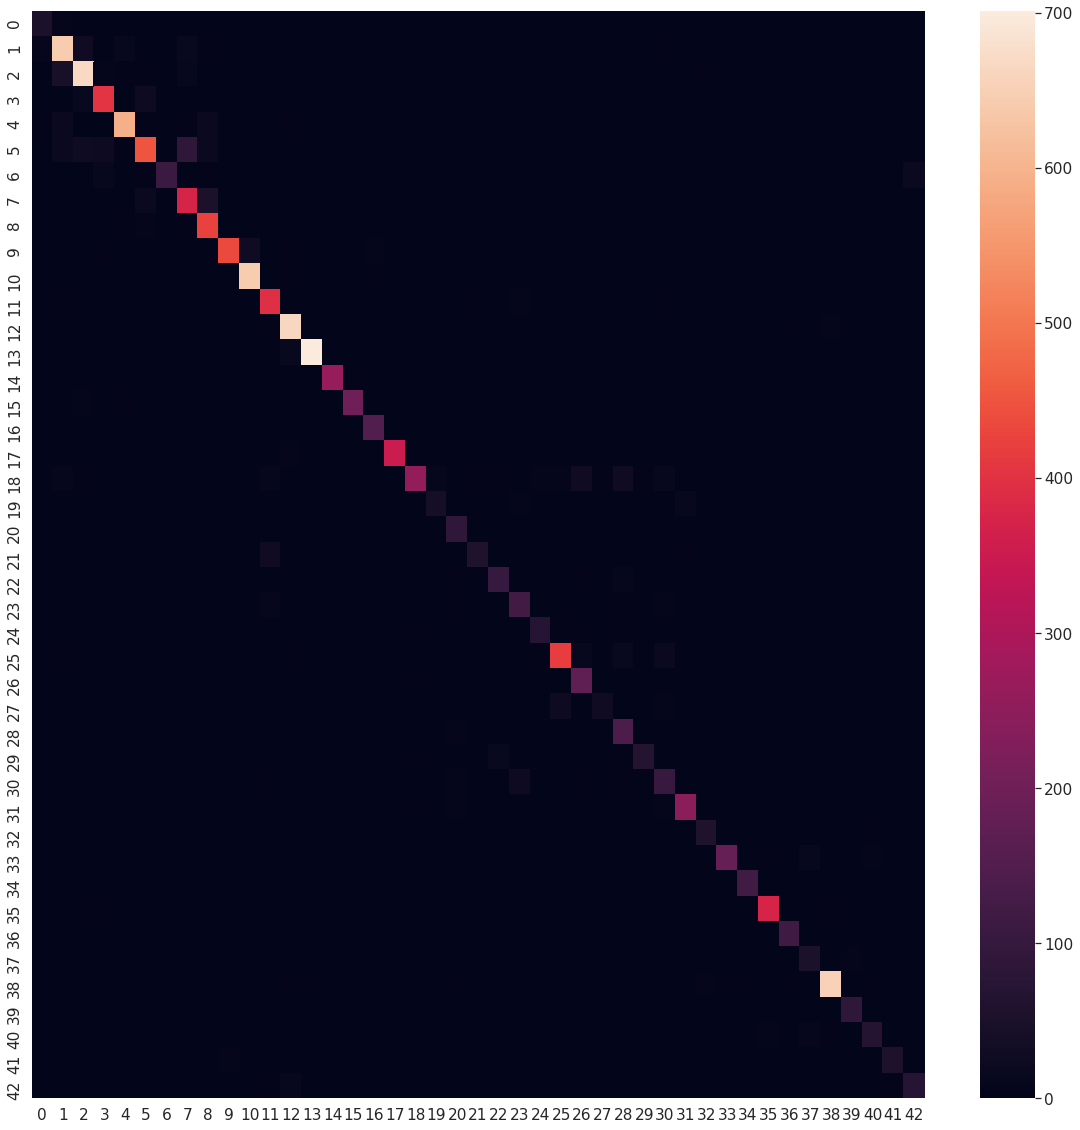

In [ ]:
labele_pred_conf4=np.argmax(labele_pred4, axis=1)
labele_test_conf4=labele_test.reshape(labele_pred_conf4.shape[0],)
conf4=confusion_matrix(labele_test_conf4,labele_pred_conf4)

df_cm = pd.DataFrame(conf4, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.show()

In [ ]:
izvestaj4=classification_report(labele_test_conf4, labele_pred_conf4)

print(izvestaj4)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        60
           1       0.85      0.89      0.87       720
           2       0.88      0.89      0.88       750
           3       0.87      0.90      0.89       450
           4       0.96      0.90      0.93       660
           5       0.87      0.72      0.79       630
           6       1.00      0.73      0.84       150
           7       0.75      0.83      0.79       450
           8       0.81      0.94      0.87       450
           9       0.97      0.90      0.94       480
          10       0.96      0.97      0.97       660
          11       0.86      0.94      0.90       420
          12       0.92      0.96      0.94       690
          13       0.98      0.97      0.98       720
          14       1.00      0.97      0.99       270
          15       0.97      0.95      0.96       210
          16       0.91      0.99      0.95       150
          17       0.99    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

resnet50=ResNet50((32,32,3),L)

activation="relu"
lr=0.0001
bs=32

resnet50.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history5 = resnet50.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)


Epoch 1/30
1226/1226 [==============================] - 51s 38ms/step - loss: 9.4655 - accuracy: 0.1043 - val_loss: 2.4151 - val_accuracy: 0.2962
Epoch 2/30
1226/1226 [==============================] - 47s 38ms/step - loss: 3.8402 - accuracy: 0.4615 - val_loss: 1.9016 - val_accuracy: 0.4507
Epoch 3/30
1226/1226 [==============================] - 47s 39ms/step - loss: 1.9880 - accuracy: 0.6777 - val_loss: 1.4375 - val_accuracy: 0.5867
Epoch 4/30
1226/1226 [==============================] - 48s 39ms/step - loss: 1.1740 - accuracy: 0.7971 - val_loss: 1.1639 - val_accuracy: 0.6717
Epoch 5/30
1226/1226 [==============================] - 48s 39ms/step - loss: 0.7734 - accuracy: 0.8622 - val_loss: 1.0981 - val_accuracy: 0.7057
Epoch 6/30
1226/1226 [==============================] - 48s 39ms/step - loss: 0.6084 - accuracy: 0.8971 - val_loss: 0.9575 - val_accuracy: 0.7459
Epoch 7/30
1226/1226 [==============================] - 48s 39ms/step - loss: 0.3766 - accuracy: 0.9314 - val_loss: 0.7792 -

In [ ]:
labele_pred5=resnet50.predict(x=slike_test_norm)

In [ ]:
eval5=resnet50.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 4s 10ms/step - loss: 0.3491 - accuracy: 0.9239


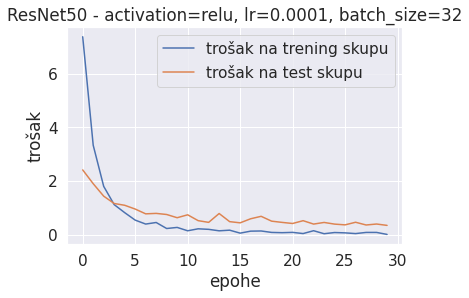

In [ ]:
train_losses5=history5.history["loss"]
test_losses5=history5.history["val_loss"]

plt.plot(train_losses5,label="trošak na trening skupu")
plt.plot(test_losses5,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("ResNet50 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

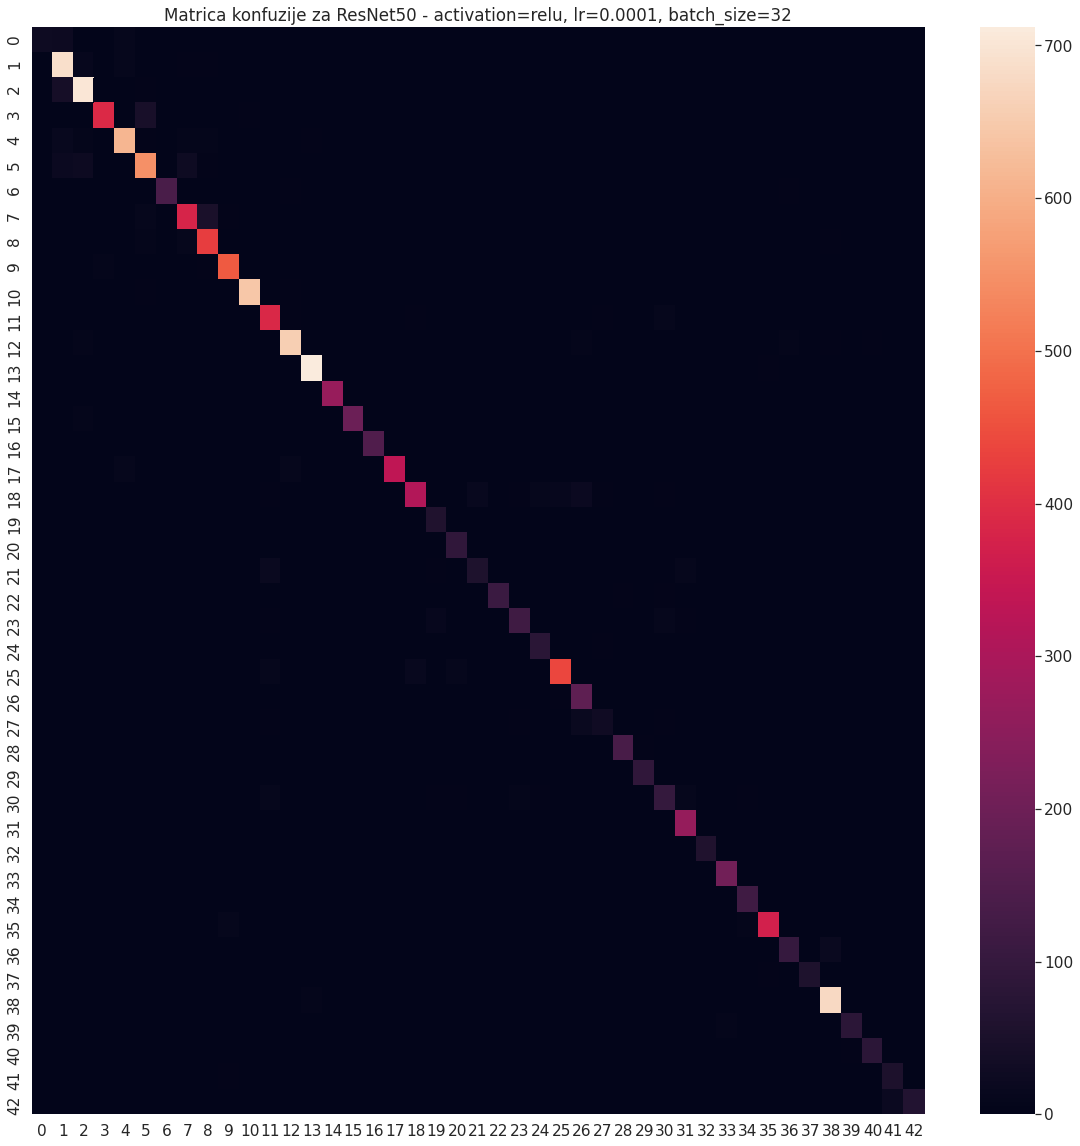

In [ ]:
labele_pred_conf5=np.argmax(labele_pred5, axis=1)
labele_test_conf5=labele_test.reshape(labele_pred_conf5.shape[0],)
conf5=confusion_matrix(labele_test_conf5,labele_pred_conf5)

df_cm = pd.DataFrame(conf5, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za ResNet50 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [ ]:
izvestaj5=classification_report(labele_test_conf5, labele_pred_conf5)

print(izvestaj5)

              precision    recall  f1-score   support

           0       0.90      0.45      0.60        60
           1       0.87      0.96      0.91       720
           2       0.91      0.94      0.92       750
           3       0.98      0.87      0.92       450
           4       0.94      0.93      0.93       660
           5       0.88      0.87      0.88       630
           6       0.99      0.91      0.95       150
           7       0.88      0.84      0.86       450
           8       0.86      0.94      0.90       450
           9       0.94      0.97      0.96       480
          10       0.99      0.98      0.98       660
          11       0.88      0.93      0.90       420
          12       0.96      0.96      0.96       690
          13       0.98      0.99      0.98       720
          14       1.00      0.99      0.99       270
          15       0.98      0.94      0.96       210
          16       1.00      1.00      1.00       150
          17       0.99    

In [ ]:
proba="proba%i.json"%10
print(proba)

proba10.json


In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

resnet50=ResNet50((32,32,3),L)

activation="relu"
lr=0.0001
bs=64

resnet50.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history6 = resnet50.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
613/613 [==============================] - 35s 50ms/step - loss: 9.2568 - accuracy: 0.1103 - val_loss: 2.4478 - val_accuracy: 0.2663
Epoch 2/30
613/613 [==============================] - 29s 47ms/step - loss: 3.7977 - accuracy: 0.4562 - val_loss: 2.0623 - val_accuracy: 0.4025
Epoch 3/30
613/613 [==============================] - 29s 47ms/step - loss: 1.8908 - accuracy: 0.6772 - val_loss: 1.9426 - val_accuracy: 0.4705
Epoch 4/30
613/613 [==============================] - 29s 47ms/step - loss: 1.2196 - accuracy: 0.7820 - val_loss: 1.5600 - val_accuracy: 0.5820
Epoch 5/30
613/613 [==============================] - 29s 47ms/step - loss: 0.8421 - accuracy: 0.8482 - val_loss: 1.4771 - val_accuracy: 0.6212
Epoch 6/30
613/613 [==============================] - 29s 47ms/step - loss: 0.6812 - accuracy: 0.8789 - val_loss: 1.2847 - val_accuracy: 0.6774
Epoch 7/30
613/613 [==============================] - 29s 47ms/step - loss: 0.4496 - accuracy: 0.9157 - val_loss: 1.4114 - val_accuracy:

In [ ]:

labele_pred6=resnet50.predict(x=slike_test_norm)


eval6=resnet50.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 4s 10ms/step - loss: 0.5890 - accuracy: 0.8750


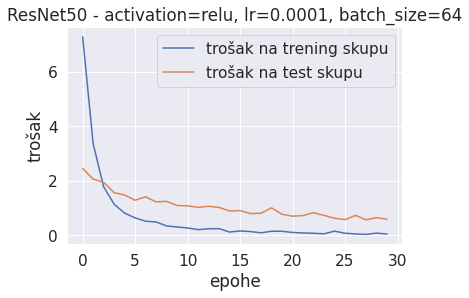

In [ ]:
train_losses6=history6.history["loss"]
test_losses6=history6.history["val_loss"]

plt.plot(train_losses6,label="trošak na trening skupu")
plt.plot(test_losses6,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("ResNet50 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

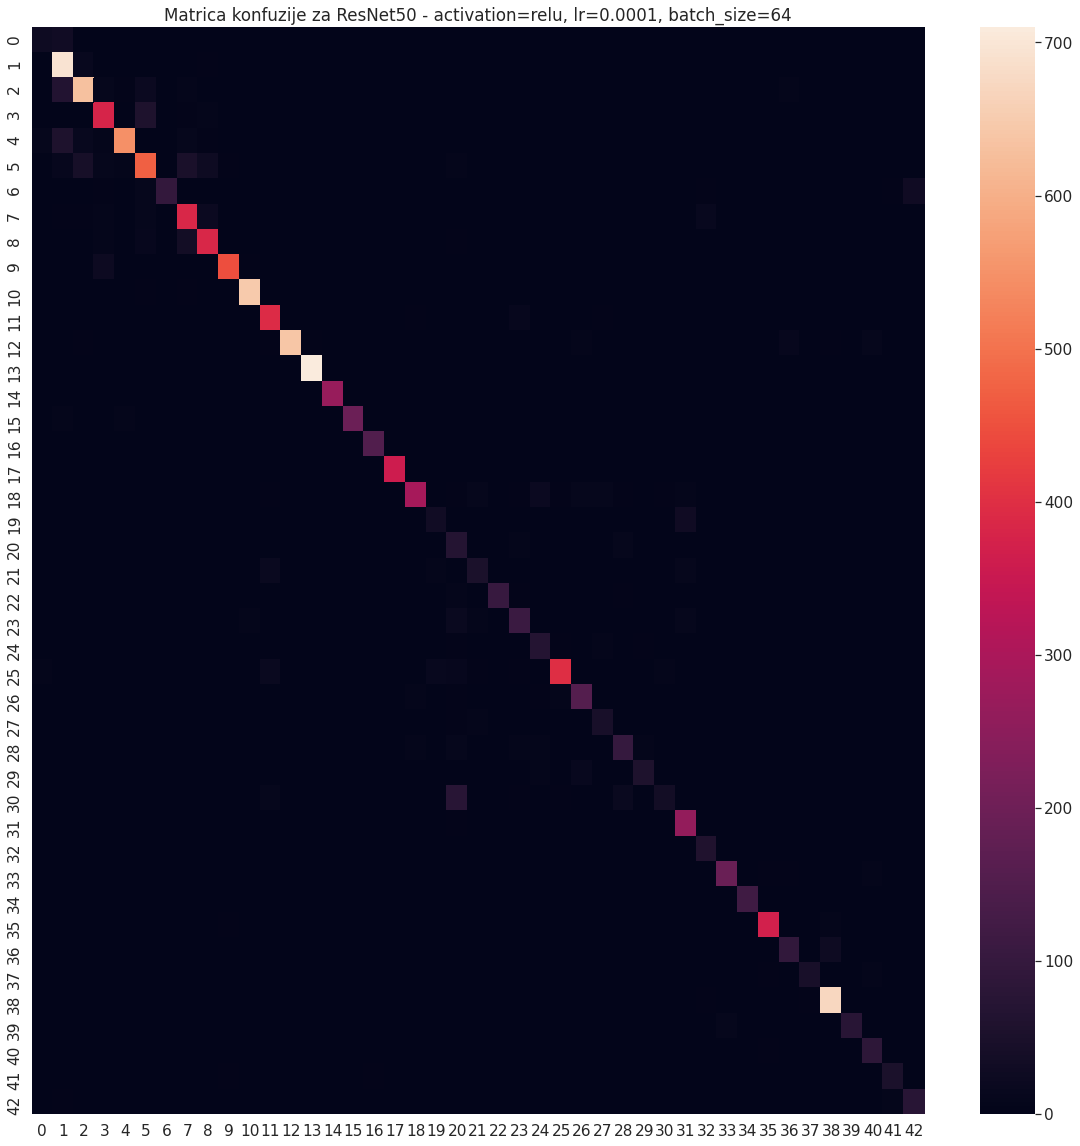

In [ ]:
labele_pred_conf6=np.argmax(labele_pred6, axis=1)
labele_test_conf6=labele_test.reshape(labele_pred_conf6.shape[0],)
conf6=confusion_matrix(labele_test_conf6,labele_pred_conf6)

df_cm = pd.DataFrame(conf6, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za ResNet50 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [ ]:
izvestaj6=classification_report(labele_test_conf6, labele_pred_conf6)

print(izvestaj6)

              precision    recall  f1-score   support

           0       0.57      0.43      0.49        60
           1       0.78      0.97      0.86       720
           2       0.88      0.84      0.86       750
           3       0.84      0.84      0.84       450
           4       0.96      0.83      0.89       660
           5       0.80      0.75      0.78       630
           6       0.98      0.65      0.78       150
           7       0.78      0.85      0.81       450
           8       0.86      0.85      0.85       450
           9       0.95      0.93      0.94       480
          10       0.97      0.98      0.98       660
          11       0.87      0.93      0.90       420
          12       1.00      0.92      0.96       690
          13       0.99      0.99      0.99       720
          14       1.00      0.99      1.00       270
          15       0.99      0.93      0.96       210
          16       0.97      1.00      0.98       150
          17       1.00    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

resnet50=ResNet50((32,32,3),L)

activation="relu"
lr=0.0001
bs=128

resnet50.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history7 = resnet50.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)


Epoch 1/30
307/307 [==============================] - 27s 75ms/step - loss: 9.4679 - accuracy: 0.1029 - val_loss: 3.4612 - val_accuracy: 0.0736
Epoch 2/30
307/307 [==============================] - 22s 71ms/step - loss: 4.0135 - accuracy: 0.4322 - val_loss: 2.3236 - val_accuracy: 0.3354
Epoch 3/30
307/307 [==============================] - 21s 70ms/step - loss: 2.2326 - accuracy: 0.6331 - val_loss: 2.1427 - val_accuracy: 0.4300
Epoch 4/30
307/307 [==============================] - 21s 70ms/step - loss: 1.3235 - accuracy: 0.7511 - val_loss: 2.2043 - val_accuracy: 0.4822
Epoch 5/30
307/307 [==============================] - 22s 71ms/step - loss: 0.9322 - accuracy: 0.8178 - val_loss: 1.8197 - val_accuracy: 0.5470
Epoch 6/30
307/307 [==============================] - 22s 71ms/step - loss: 0.6392 - accuracy: 0.8681 - val_loss: 1.8304 - val_accuracy: 0.5762
Epoch 7/30
307/307 [==============================] - 22s 70ms/step - loss: 0.5437 - accuracy: 0.8966 - val_loss: 1.9333 - val_accuracy:

In [ ]:
labele_pred7=resnet50.predict(x=slike_test_norm)


eval7=resnet50.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 4s 9ms/step - loss: 1.3143 - accuracy: 0.7367


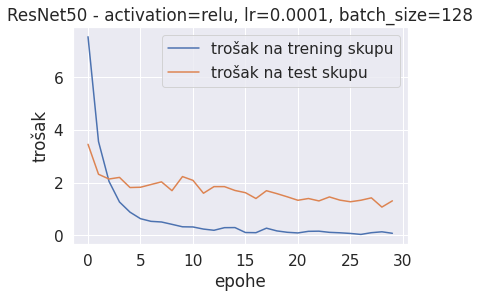

In [ ]:
train_losses7=history7.history["loss"]
test_losses7=history7.history["val_loss"]

plt.plot(train_losses7,label="trošak na trening skupu")
plt.plot(test_losses7,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("ResNet50 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

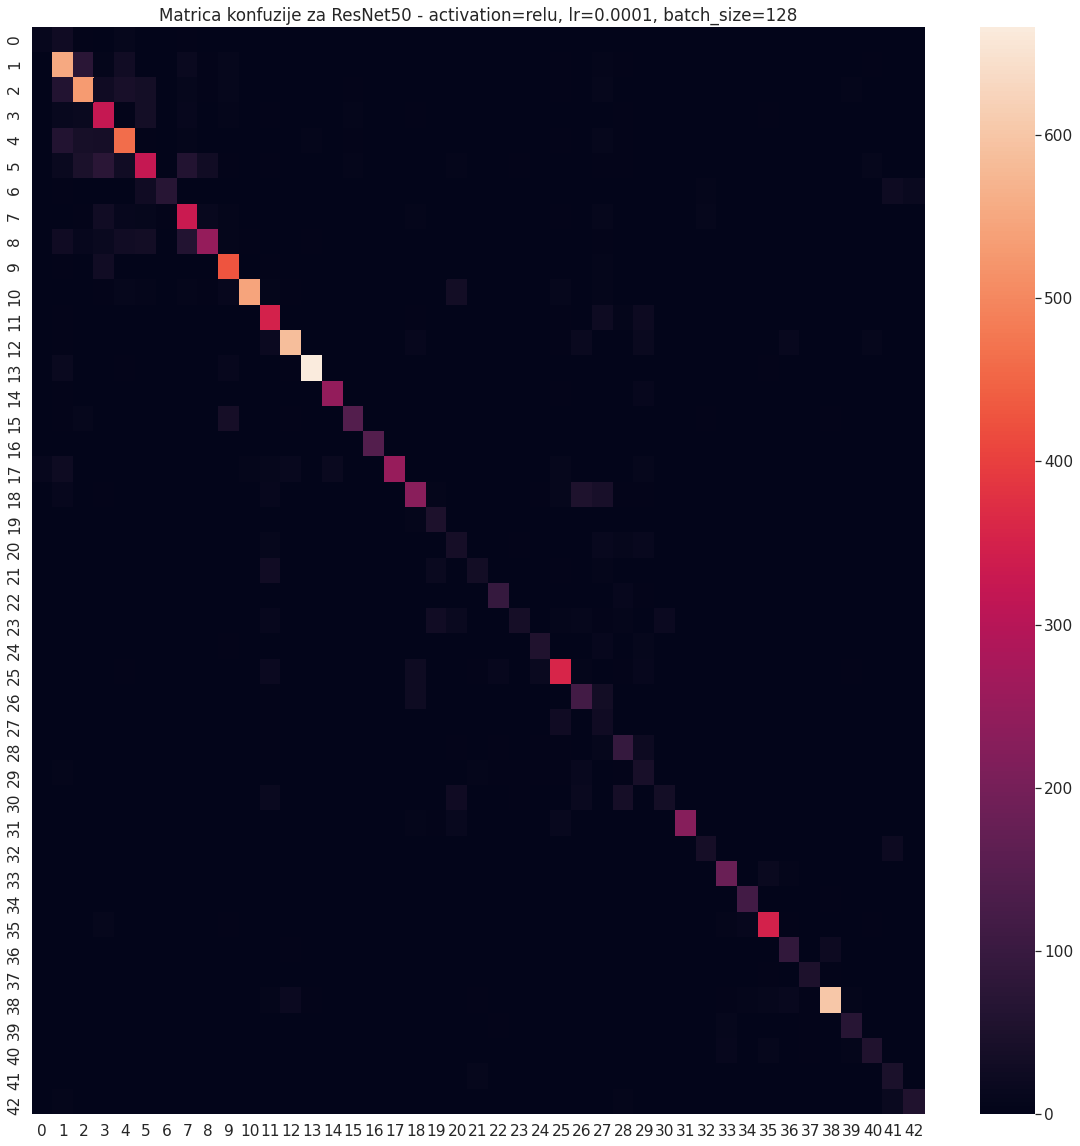

In [ ]:
labele_pred_conf7=np.argmax(labele_pred7, axis=1)
labele_test_conf7=labele_test.reshape(labele_pred_conf7.shape[0],)
conf7=confusion_matrix(labele_test_conf7,labele_pred_conf7)

df_cm = pd.DataFrame(conf7, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za ResNet50 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [ ]:
izvestaj7=classification_report(labele_test_conf7, labele_pred_conf7)

print(izvestaj7)

              precision    recall  f1-score   support

           0       0.39      0.18      0.25        60
           1       0.64      0.77      0.70       720
           2       0.71      0.71      0.71       750
           3       0.57      0.72      0.64       450
           4       0.72      0.70      0.71       660
           5       0.68      0.52      0.59       630
           6       0.89      0.45      0.60       150
           7       0.65      0.74      0.69       450
           8       0.82      0.55      0.66       450
           9       0.79      0.89      0.84       480
          10       0.97      0.82      0.89       660
          11       0.66      0.83      0.74       420
          12       0.91      0.85      0.88       690
          13       0.97      0.93      0.95       720
          14       0.94      0.91      0.93       270
          15       0.84      0.69      0.76       210
          16       0.98      0.97      0.97       150
          17       1.00    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

resnet50=ResNet50((32,32,3),L)

activation="relu"
lr=0.0001
bs=256

resnet50.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history8 = resnet50.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
154/154 [==============================] - 22s 109ms/step - loss: 9.7846 - accuracy: 0.0902 - val_loss: 3.6510 - val_accuracy: 0.0390
Epoch 2/30
154/154 [==============================] - 16s 105ms/step - loss: 4.6421 - accuracy: 0.3705 - val_loss: 3.3380 - val_accuracy: 0.1025
Epoch 3/30
154/154 [==============================] - 16s 106ms/step - loss: 2.6505 - accuracy: 0.5729 - val_loss: 2.6382 - val_accuracy: 0.2764
Epoch 4/30
154/154 [==============================] - 17s 108ms/step - loss: 1.6581 - accuracy: 0.7006 - val_loss: 2.1028 - val_accuracy: 0.4302
Epoch 5/30
154/154 [==============================] - 17s 109ms/step - loss: 1.0627 - accuracy: 0.7927 - val_loss: 2.0530 - val_accuracy: 0.4758
Epoch 6/30
154/154 [==============================] - 17s 109ms/step - loss: 0.9993 - accuracy: 0.8088 - val_loss: 2.1418 - val_accuracy: 0.4953
Epoch 7/30
154/154 [==============================] - 17s 109ms/step - loss: 0.7118 - accuracy: 0.8652 - val_loss: 2.0209 - val_ac

In [ ]:
labele_pred8=resnet50.predict(x=slike_test_norm)


eval8=resnet50.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 4s 9ms/step - loss: 1.7247 - accuracy: 0.6780


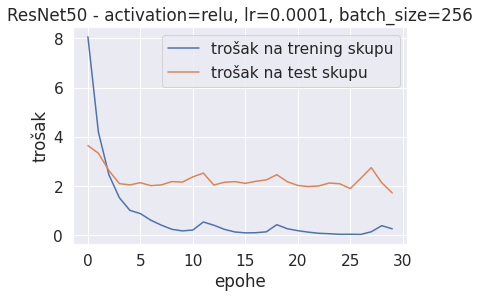

In [ ]:
train_losses8=history8.history["loss"]
test_losses8=history8.history["val_loss"]

plt.plot(train_losses8,label="trošak na trening skupu")
plt.plot(test_losses8,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("ResNet50 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

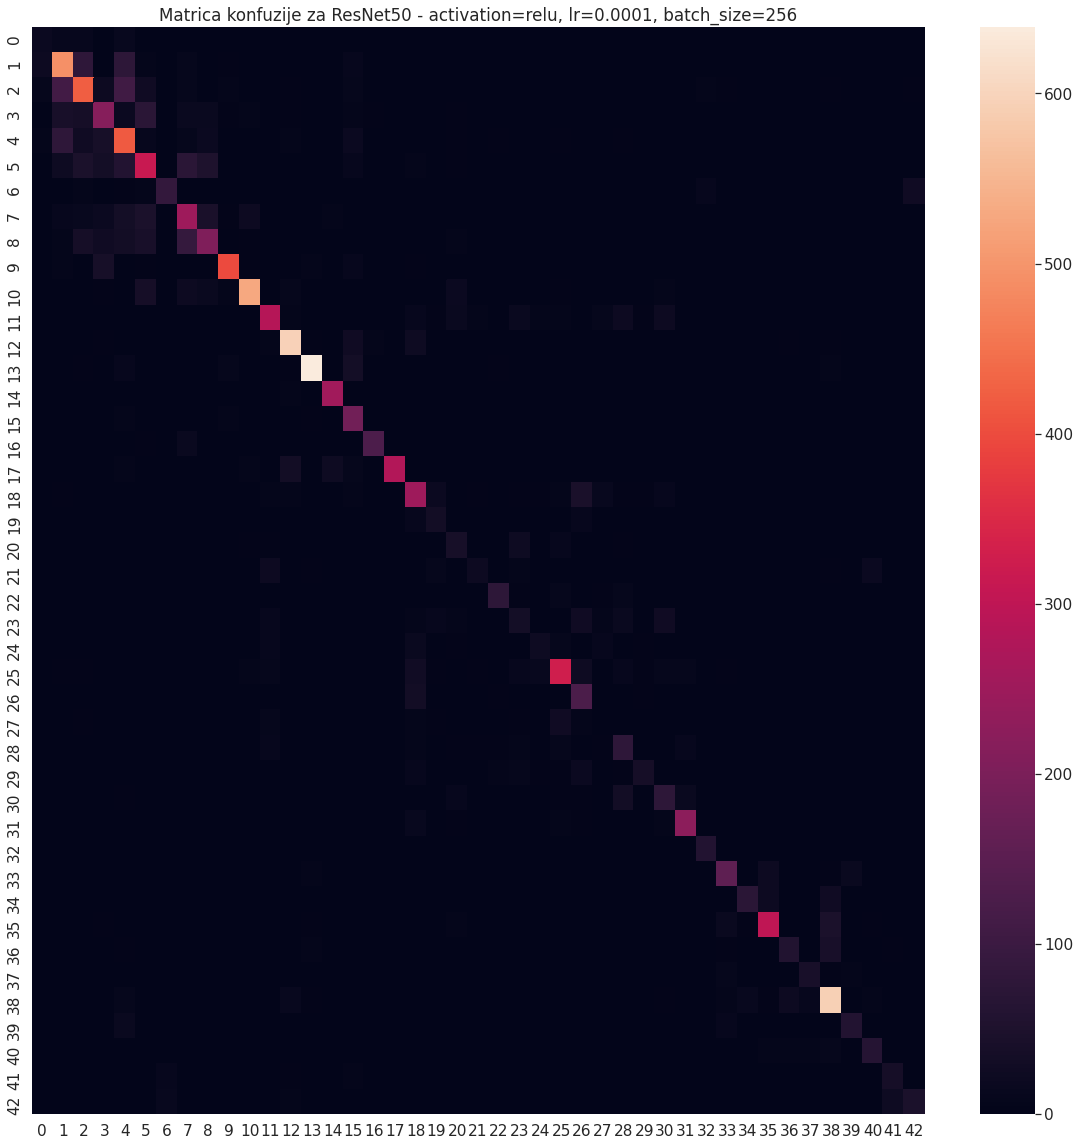

In [ ]:
labele_pred_conf8=np.argmax(labele_pred8, axis=1)
labele_test_conf8=labele_test.reshape(labele_pred_conf8.shape[0],)
conf8=confusion_matrix(labele_test_conf8,labele_pred_conf8)

df_cm = pd.DataFrame(conf8, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za ResNet50 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [ ]:
izvestaj8=classification_report(labele_test_conf8, labele_pred_conf8)

print(izvestaj8)

              precision    recall  f1-score   support

           0       0.32      0.32      0.32        60
           1       0.62      0.69      0.65       720
           2       0.60      0.56      0.58       750
           3       0.52      0.48      0.50       450
           4       0.50      0.63      0.56       660
           5       0.55      0.50      0.53       630
           6       0.73      0.57      0.64       150
           7       0.51      0.56      0.53       450
           8       0.58      0.46      0.51       450
           9       0.89      0.83      0.86       480
          10       0.90      0.80      0.85       660
          11       0.75      0.68      0.71       420
          12       0.85      0.86      0.86       690
          13       0.94      0.89      0.91       720
          14       0.88      0.95      0.91       270
          15       0.54      0.89      0.67       210
          16       0.88      0.85      0.87       150
          17       0.99    

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#aug=ImageDataGenerator(rotation_range=5,width_shift_range=0.08,height_shift_range=0.1,zoom_range=0.1) - previše oscilovanja, još uvek jako visok overfitting
aug=ImageDataGenerator(rotation_range=10,zoom_range=0.2,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.15)

In [16]:
from keras.layers import Dropout

In [17]:
def ResNet50v2(input_shape = (64, 64, 3), classes = 6):
     
    X_input = Input(input_shape)

    
    
    X = ZeroPadding2D((3, 3))(X_input)
    
  
    X = Conv2D(64, (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

  
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    X=Dropout(0.1)(X)
    X = identity_block(X, 3, [64, 64, 256])
    X=Dropout(0.1)(X)
    X = identity_block(X, 3, [64, 64, 256])
    X=Dropout(0.1)(X)


    X = convolutional_block(X, f = 3, filters = [128,128,512],s = 2)
    X=Dropout(0.1)(X)
    X = identity_block(X, 3, [128,128,512])
    X=Dropout(0.1)(X)
    X = identity_block(X, 3, [128,128,512])
    X=Dropout(0.1)(X)
    X = identity_block(X, 3, [128,128,512])
    X=Dropout(0.1)(X)

    X = convolutional_block(X, f = 3, filters = [256, 256, 1024],s = 2)
    X=Dropout(0.1)(X)
    X = identity_block(X, 3, [256, 256, 1024])
    X=Dropout(0.1)(X)
    X = identity_block(X, 3, [256, 256, 1024])
    X=Dropout(0.1)(X)
    X = identity_block(X, 3, [256, 256, 1024])
    X=Dropout(0.1)(X)
    X = identity_block(X, 3, [256, 256, 1024])
    X=Dropout(0.1)(X)
    X = identity_block(X, 3, [256, 256, 1024])
    X=Dropout(0.1)(X)

    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], s = 2)
    X=Dropout(0.1)(X)
    X = identity_block(X, 3, [512, 512, 2048])
    X=Dropout(0.1)(X)
    X = identity_block(X, 3, [512, 512, 2048])
    X=Dropout(0.1)(X)

    X = AveragePooling2D(pool_size=(2,2),padding="same")(X)
    

    X = Flatten()(X)
    X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model


In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

resnet50=ResNet50v2((32,32,3),L)

activation="relu"
lr=0.0001
bs=32

resnet50.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history9 = resnet50.fit(slike_train_norm, labele_train_one_hot, batch_size=bs,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
1226/1226 [==============================] - 52s 39ms/step - loss: 12.0512 - accuracy: 0.0298 - val_loss: 3.4473 - val_accuracy: 0.0451
Epoch 2/30
1226/1226 [==============================] - 47s 38ms/step - loss: 8.5896 - accuracy: 0.0725 - val_loss: 2.5280 - val_accuracy: 0.1641
Epoch 3/30
1226/1226 [==============================] - 48s 39ms/step - loss: 6.4812 - accuracy: 0.2016 - val_loss: 2.0399 - val_accuracy: 0.3127
Epoch 4/30
1226/1226 [==============================] - 48s 39ms/step - loss: 4.4816 - accuracy: 0.3951 - val_loss: 1.3354 - val_accuracy: 0.5496
Epoch 5/30
1226/1226 [==============================] - 48s 39ms/step - loss: 2.4474 - accuracy: 0.6131 - val_loss: 0.8904 - val_accuracy: 0.7006
Epoch 6/30
1226/1226 [==============================] - 48s 39ms/step - loss: 1.4915 - accuracy: 0.7340 - val_loss: 0.6631 - val_accuracy: 0.7855
Epoch 7/30
1226/1226 [==============================] - 48s 39ms/step - loss: 0.9552 - accuracy: 0.8201 - val_loss: 18.2540

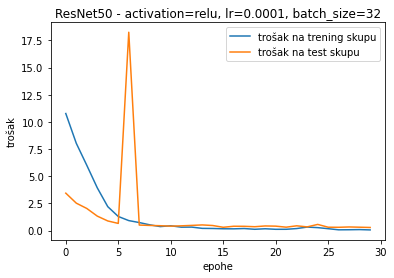

In [ ]:
train_losses9=history9.history["loss"]
test_losses9=history9.history["val_loss"]

plt.plot(train_losses9,label="trošak na trening skupu")
plt.plot(test_losses9,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("ResNet50 - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

In [ ]:

labele_pred9=resnet50.predict(x=slike_test_norm)


eval9=resnet50.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 4s 9ms/step - loss: 0.2893 - accuracy: 0.9371


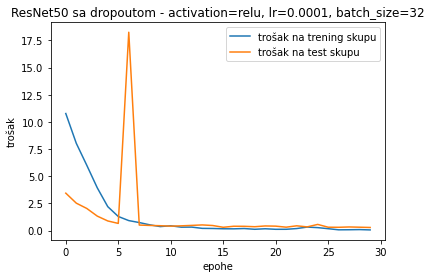

In [ ]:
train_losses9=history9.history["loss"]
test_losses9=history9.history["val_loss"]

plt.plot(train_losses9,label="trošak na trening skupu")
plt.plot(test_losses9,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("ResNet50 sa dropoutom - activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

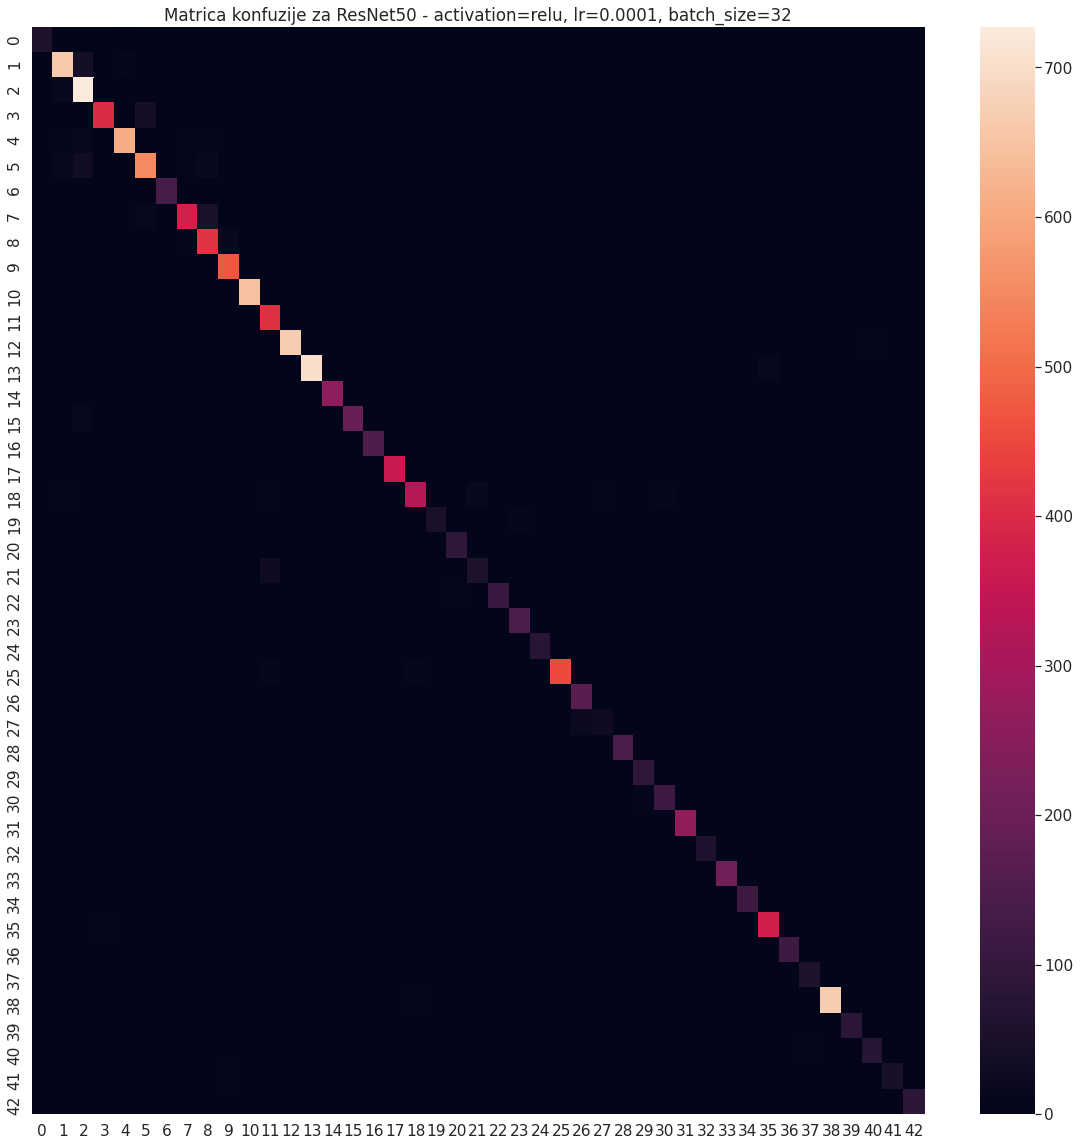

In [ ]:
labele_pred_conf9=np.argmax(labele_pred9, axis=1)
labele_test_conf9=labele_test.reshape(labele_pred_conf9.shape[0],)
conf9=confusion_matrix(labele_test_conf9,labele_pred_conf9)

df_cm = pd.DataFrame(conf9, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za ResNet50 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()


In [ ]:
izvestaj9=classification_report(labele_test_conf9, labele_pred_conf9)

print(izvestaj9)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.94      0.92      0.93       720
           2       0.87      0.97      0.92       750
           3       0.97      0.90      0.93       450
           4       0.97      0.92      0.95       660
           5       0.90      0.87      0.88       630
           6       0.96      0.91      0.93       150
           7       0.94      0.84      0.89       450
           8       0.83      0.93      0.88       450
           9       0.91      0.99      0.95       480
          10       0.99      0.98      0.99       660
          11       0.88      0.98      0.93       420
          12       0.99      0.97      0.98       690
          13       0.99      0.98      0.98       720
          14       0.98      0.98      0.98       270
          15       0.99      0.91      0.95       210
          16       1.00      0.99      1.00       150
          17       0.99    

In [45]:
def identity_blockv3(X, f, filters):

    F1, F2, F3 = filters

    X_pom = X
    
    
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid',kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3,momentum=0.9)(X)
    X = Activation('relu')(X)
    X = Dropout(0.1)(X)   

    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same',kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3,momentum=0.9)(X)
    X = Activation('relu')(X)
    X = Dropout(0.1)(X)

    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid',kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3,momentum=0.9)(X)

    X = Add()([X, X_pom])
    X = Activation('relu')(X)
    X = Dropout(0.1)(X)
    
    return X

def convolutional_blockv3(X, f, filters, s = 2):

    
    F1, F2, F3 = filters
    
    
    X_pom = X

    X = Conv2D(F1, (1, 1), strides = (s,s),kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3,momentum=0.9)(X)
    X = Activation('relu')(X)
    X = Dropout(0.1)(X)
    
    X = Conv2D(F2, (f, f), strides = (1, 1), padding = 'same',kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3,momentum=0.9)(X)
    X = Activation('relu')(X)
    X = Dropout(0.1)(X)

    X = Conv2D(F3, (1, 1), strides = (1, 1), padding = 'valid',kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3,momentum=0.9)(X)

    
    X_pom = Conv2D(F3, (1, 1), strides = (s, s), padding = 'valid',kernel_initializer = glorot_uniform(seed=0))(X_pom)
    X_pom = BatchNormalization(axis = 3,momentum=0.9)(X_pom)

  
    X = Add()([X, X_pom])
    X = Activation('relu')(X)
    X = Dropout(0.1)(X)
    
    return X

def ResNet50v3(input_shape = (64, 64, 3), classes = 6):
     
    X_input = Input(input_shape)

    
    
    X = ZeroPadding2D((3, 3))(X_input)
    
  
    X = Conv2D(64, (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3,momentum=0.9)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

  
    X = convolutional_blockv3(X, f = 3, filters = [64, 64, 256], s = 1)
    X = identity_blockv3(X, 3, [64, 64, 256])
    X = identity_blockv3(X, 3, [64, 64, 256])


    X = convolutional_blockv3(X, f = 3, filters = [128,128,512],s = 2)
    X = identity_blockv3(X, 3, [128,128,512])
    X = identity_blockv3(X, 3, [128,128,512])
    X = identity_blockv3(X, 3, [128,128,512])

    X = convolutional_blockv3(X, f = 3, filters = [256, 256, 1024],s = 2)
    X = identity_blockv3(X, 3, [256, 256, 1024])
    X = identity_blockv3(X, 3, [256, 256, 1024])
    X = identity_blockv3(X, 3, [256, 256, 1024])
    X = identity_blockv3(X, 3, [256, 256, 1024])
    X = identity_blockv3(X, 3, [256, 256, 1024])

    X = convolutional_blockv3(X, f = 3, filters = [512, 512, 2048], s = 2)
    X = identity_blockv3(X, 3, [512, 512, 2048])
    X = identity_blockv3(X, 3, [512, 512, 2048])

    X = AveragePooling2D(pool_size=(2,2),padding="same")(X)
    

    X = Flatten()(X)
    X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform(seed=0))(X)
    
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model


In [46]:
aug=ImageDataGenerator(rotation_range=10,shear_range=0.2,zoom_range=0.2,width_shift_range=0.01,height_shift_range=0.01)

In [47]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

resnet50=ResNet50v3((32,32,3),L)


activation="relu"
lr=0.0001
bs=32

resnet50.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history11 = resnet50.fit(aug.flow(slike_train_norm, labele_train_one_hot, batch_size=bs,seed=1),shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)
                    

Epoch 1/30
1226/1226 [==============================] - 142s 110ms/step - loss: 12.5397 - accuracy: 0.0247 - val_loss: 3.8067 - val_accuracy: 0.0197
Epoch 2/30
1226/1226 [==============================] - 133s 109ms/step - loss: 9.9255 - accuracy: 0.0331 - val_loss: 3.3462 - val_accuracy: 0.0743
Epoch 3/30
1226/1226 [==============================] - 133s 108ms/step - loss: 8.5571 - accuracy: 0.0627 - val_loss: 2.8875 - val_accuracy: 0.1084
Epoch 4/30
1226/1226 [==============================] - 133s 109ms/step - loss: 7.0783 - accuracy: 0.1377 - val_loss: 2.2386 - val_accuracy: 0.2561
Epoch 5/30
1226/1226 [==============================] - 133s 109ms/step - loss: 5.4782 - accuracy: 0.2797 - val_loss: 1.4968 - val_accuracy: 0.4710
Epoch 6/30
1226/1226 [==============================] - 133s 109ms/step - loss: 3.9349 - accuracy: 0.4388 - val_loss: 1.5165 - val_accuracy: 0.4834
Epoch 7/30
1226/1226 [==============================] - 132s 107ms/step - loss: 2.9131 - accuracy: 0.5559 - val

In [48]:
labele_pred11=resnet50.predict(x=slike_test_norm)


eval11=resnet50.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 9s 24ms/step - loss: 0.2655 - accuracy: 0.9356


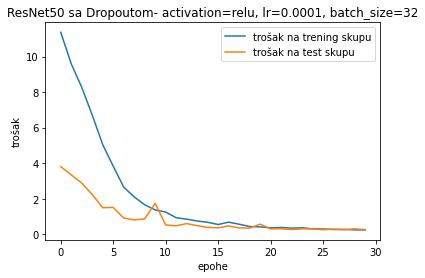

In [49]:
train_losses11=history11.history["loss"]
test_losses11=history11.history["val_loss"]

plt.plot(train_losses11,label="trošak na trening skupu")
plt.plot(test_losses11,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("ResNet50 sa Dropoutom- activation=%s, lr=%.4f, batch_size=%i"%(activation,lr,bs))
plt.show()

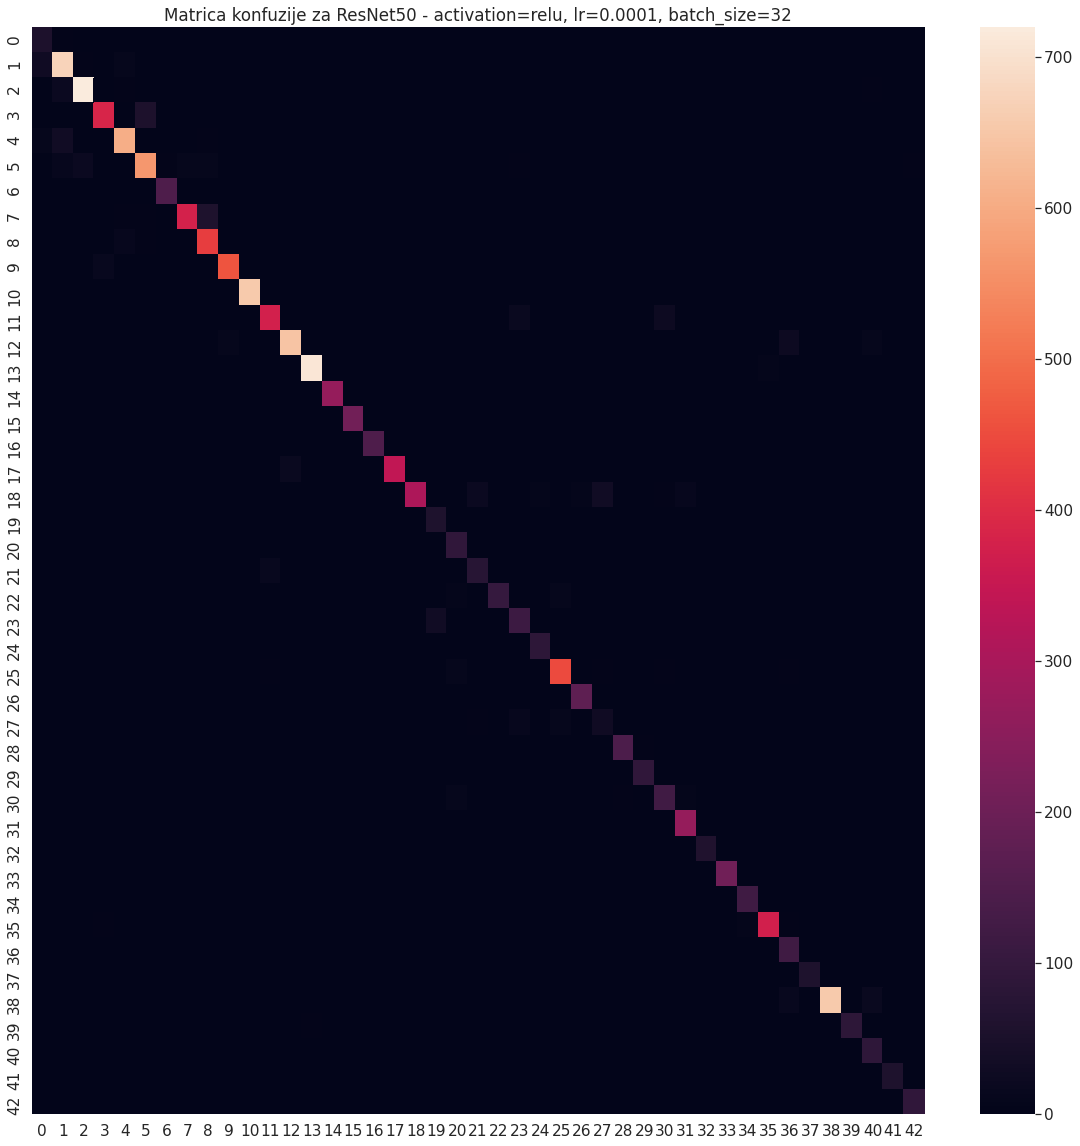

In [50]:
labele_pred_conf11=np.argmax(labele_pred11, axis=1)
labele_test_conf11=labele_test.reshape(labele_pred_conf11.shape[0],)
conf11=confusion_matrix(labele_test_conf11,labele_pred_conf11)

df_cm = pd.DataFrame(conf11, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 
plt.title("Matrica konfuzije za ResNet50 - activation=relu, lr=%.4f, batch_size=%i"%(lr,bs))
plt.show()

In [51]:
izvestaj11=classification_report(labele_test_conf11, labele_pred_conf11)

print(izvestaj11)

              precision    recall  f1-score   support

           0       0.57      0.92      0.71        60
           1       0.90      0.93      0.92       720
           2       0.97      0.96      0.96       750
           3       0.93      0.86      0.90       450
           4       0.95      0.92      0.94       660
           5       0.89      0.90      0.90       630
           6       0.97      0.98      0.97       150
           7       0.97      0.84      0.90       450
           8       0.85      0.95      0.90       450
           9       0.97      0.96      0.96       480
          10       0.99      1.00      0.99       660
          11       0.95      0.89      0.92       420
          12       0.97      0.93      0.95       690
          13       0.99      0.98      0.99       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       1.00      0.99      1.00       150
          17       1.00    

In [53]:
tezine[3]=2*tezine[3]
tezine[7]=2*tezine[7]
tezine[18]=2*tezine[18]
tezine[21]=2*tezine[21]
tezine[22]=2*tezine[22]
tezine[23]=2*tezine[23]
tezine[27]=2*tezine[27]
tezine[30]=2*tezine[30]

In [55]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

resnet50=ResNet50v3((32,32,3),L)


activation="relu"
lr=0.0001
bs=32

resnet50.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history12 = resnet50.fit(aug.flow(slike_train_norm, labele_train_one_hot, batch_size=bs,seed=1),shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)
                    

Epoch 1/30
1226/1226 [==============================] - 144s 111ms/step - loss: 14.7388 - accuracy: 0.0240 - val_loss: 3.8007 - val_accuracy: 0.0424
Epoch 2/30
1226/1226 [==============================] - 135s 110ms/step - loss: 11.6952 - accuracy: 0.0329 - val_loss: 3.6848 - val_accuracy: 0.0470
Epoch 3/30
1226/1226 [==============================] - 135s 110ms/step - loss: 10.4035 - accuracy: 0.0514 - val_loss: 2.9839 - val_accuracy: 0.0843
Epoch 4/30
1226/1226 [==============================] - 134s 109ms/step - loss: 8.3995 - accuracy: 0.1167 - val_loss: 2.1821 - val_accuracy: 0.2367
Epoch 5/30
1226/1226 [==============================] - 132s 107ms/step - loss: 6.8090 - accuracy: 0.2521 - val_loss: 1.9343 - val_accuracy: 0.3652
Epoch 6/30
1226/1226 [==============================] - 132s 108ms/step - loss: 5.0583 - accuracy: 0.3830 - val_loss: 1.4054 - val_accuracy: 0.4996
Epoch 7/30
1226/1226 [==============================] - 133s 108ms/step - loss: 4.1693 - accuracy: 0.4845 - v